In [23]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib 
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import zscore

%matplotlib inline
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook



In [13]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [14]:
#Look at training data:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
#Preprocessing - Identify duplicates in Id

unique_ids = set(train['Id'])
delta = len(unique_ids) - len(train.index)
print(delta)

0


In [16]:
#With no uniques, we can now drop the Id column
train.drop('Id', axis = 1, inplace = True)

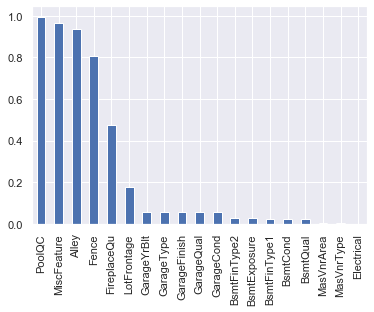

In [17]:
#Find features with missing values as a percentage of total rows
na = train.isnull().sum()/len(train.index)
na = na[na > 0]
na.sort_values(inplace=True, ascending = False)
na.plot.bar()

In [18]:
#Four features have missing values for over 80% of the rows. Let's drop them:
na = na[na >= .8]

train.drop(inplace = True, columns = na.index, axis = 1)


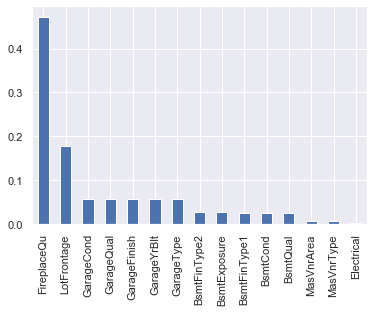

In [19]:
#Find features with missing values as a percentage of total rows
na_check = train.isnull().sum()/len(train.index)
na_check = na_check[na_check > 0]
na_check.sort_values(inplace=True, ascending = False)
na_check.plot.bar()

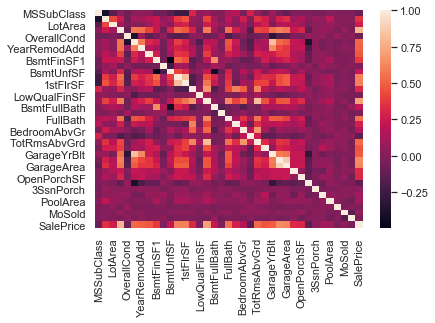

In [20]:
#Create a heatmap of the correlation matrix using seaborn to look at multicollinearity
#corr() comes from the scipy stats module
t_corr = train.corr()
sn.heatmap(t_corr)

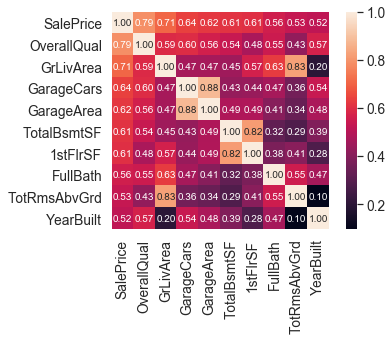

In [21]:
#Get top correlated values only

k = 10
cols = t_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sn.set(font_scale=1.25)
hm = sn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

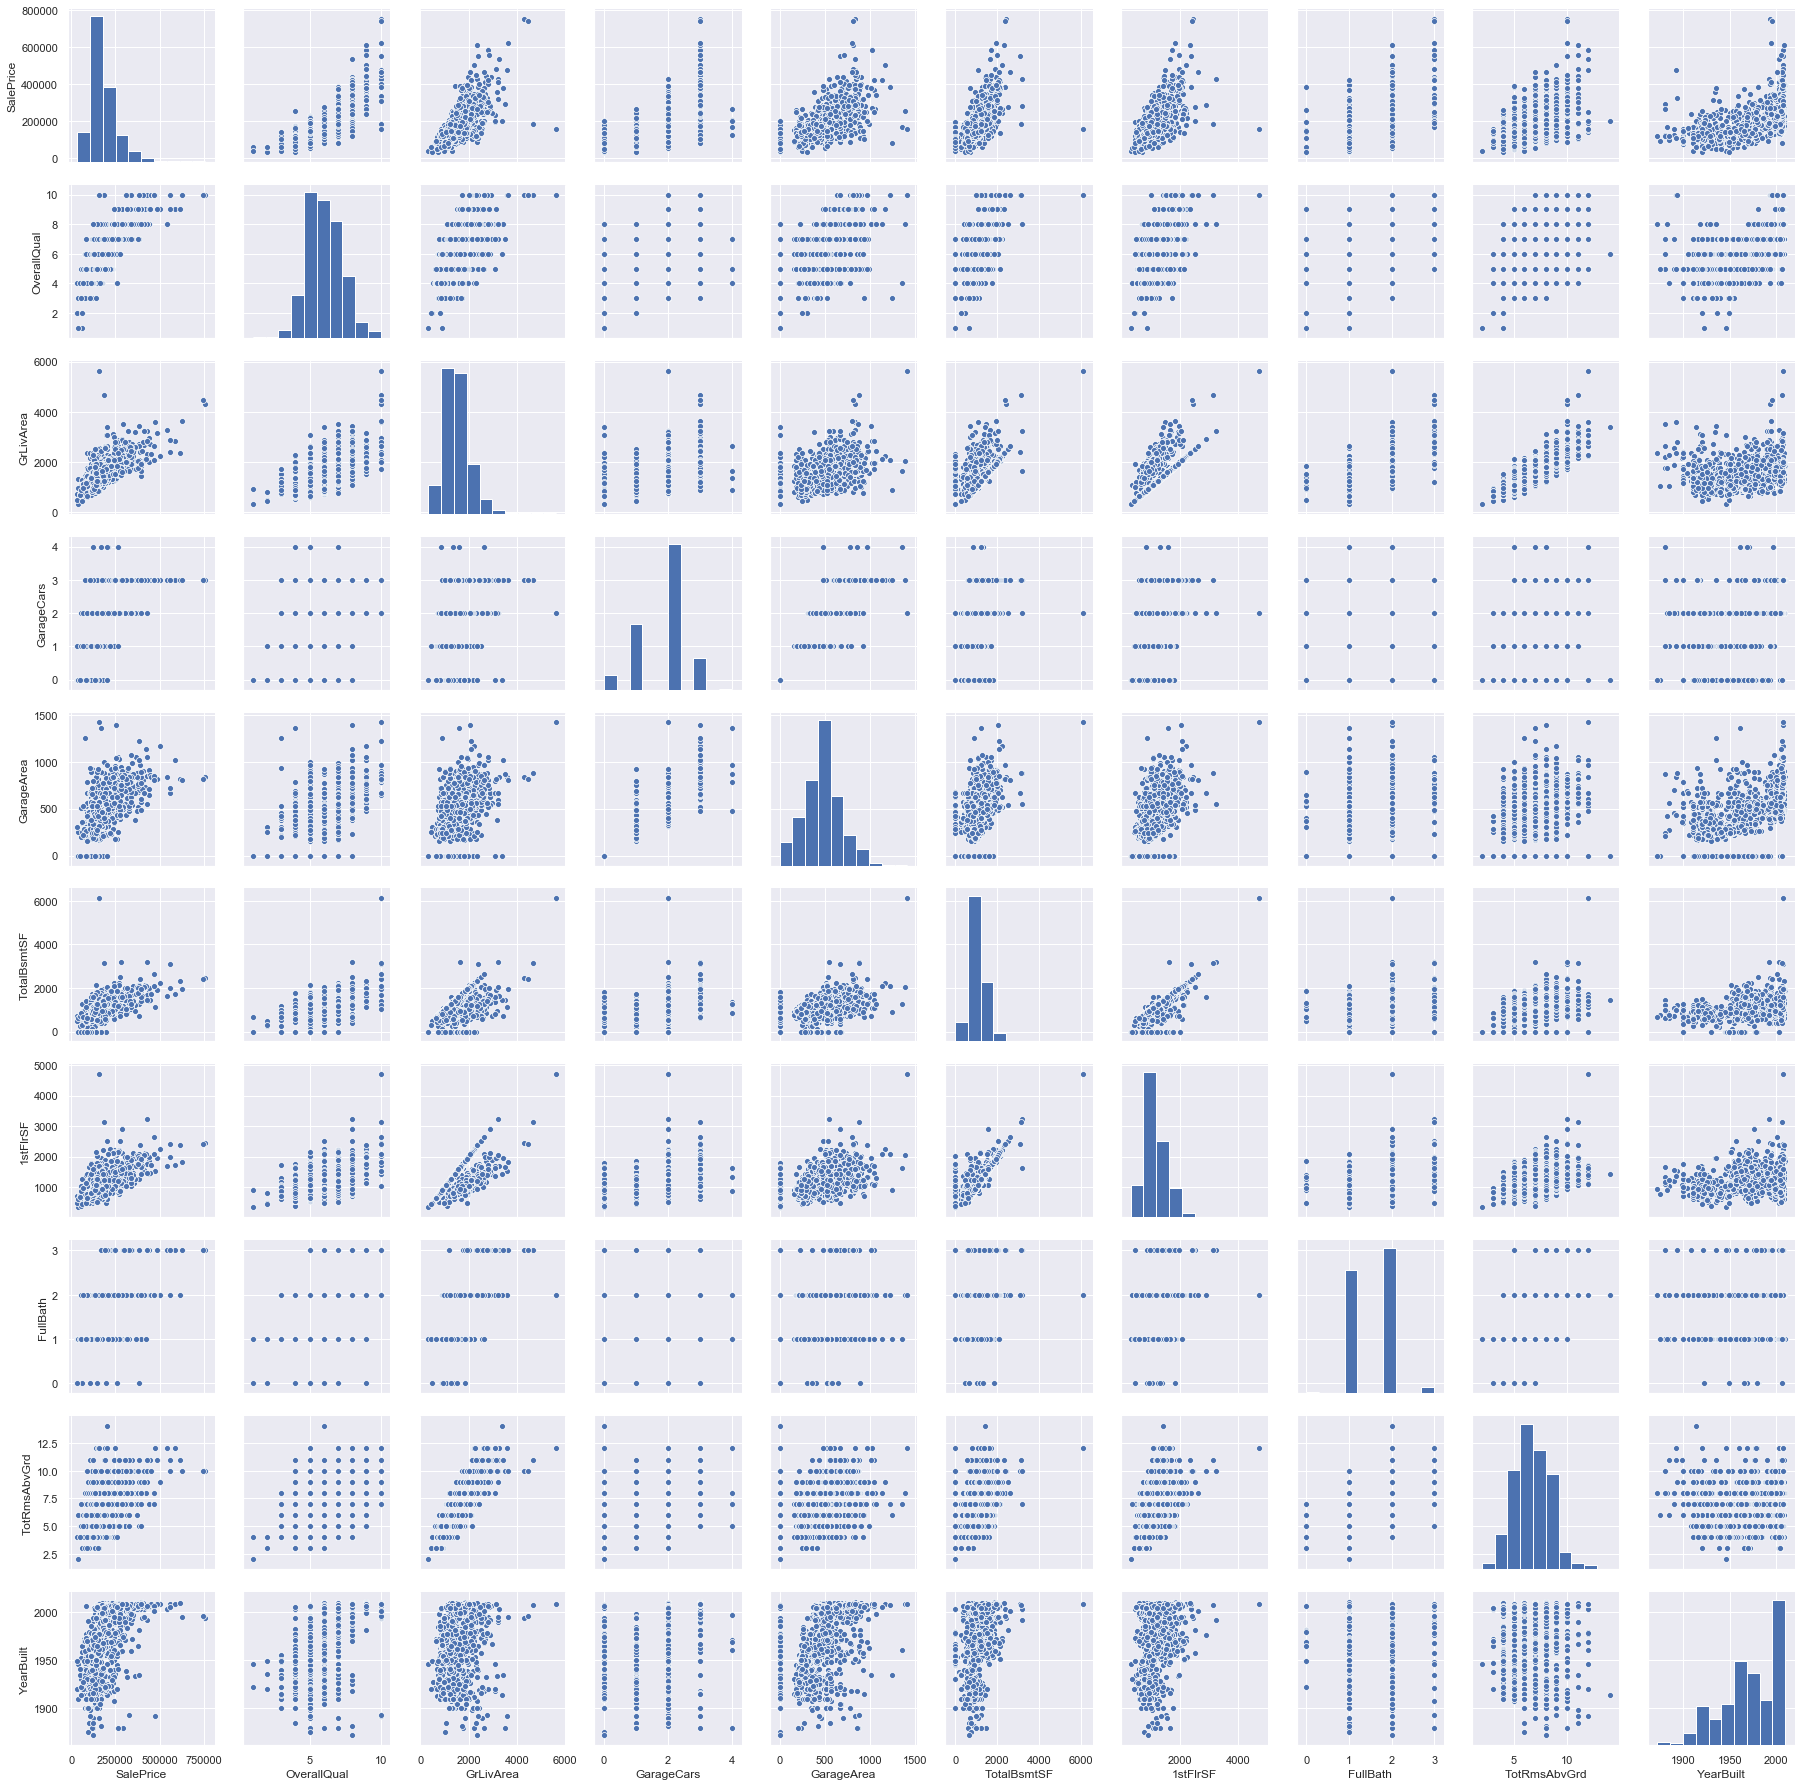

In [22]:
sn.set()
sn.pairplot(train[cols], height = 2.5)
plt.show()

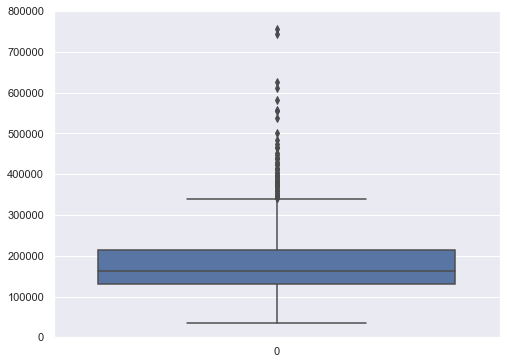

In [32]:
#box plot saleprice
#var = 'OverallQual'
#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data = train['SalePrice']
f, ax = plt.subplots(figsize=(8, 6))
fig = sn.boxplot(data=data)
fig.axis(ymin=0, ymax=800000);

In [34]:
sales_array = train['SalePrice']
z_sales = sales_array[abs(zscore(sales_array))>=3]
print(z_sales)
print(len(z_sales))


58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64
22


In [37]:
log_sales_array = np.log1p(train['SalePrice'])
log_sales_array = log_sales_array[abs(zscore(log_sales_array))>=3]
print(log_sales_array)
print(len(log_sales_array))

30      10.596660
440     13.226725
495     10.460271
533     10.579005
691     13.534474
803     13.275829
898     13.323929
916     10.471978
968     10.542733
1046    13.229570
1169    13.345509
1182    13.521141
Name: SalePrice, dtype: float64
12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12adc62b0>,
      dtype=object)

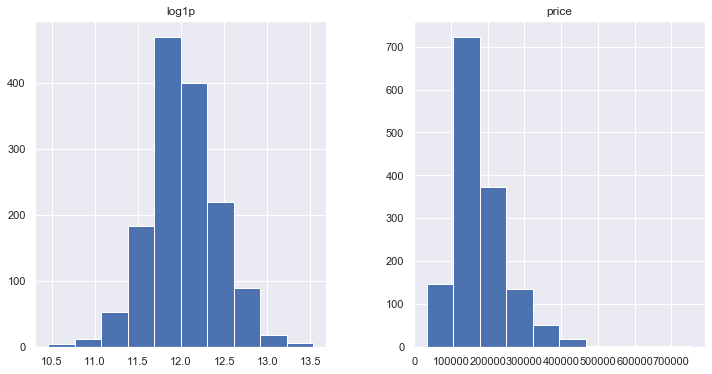

In [33]:
#Evaluate distribution of SalePrice
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log1p":np.log1p(train["SalePrice"])})
prices.hist()

In [ ]:
#Split features into quantitative vs qualitative, drop Id columns

quant = [f for f in train.columns if train.dtypes[f] != 'object']
print('Quant values :')
print(quant)


qual = [f for f in train.columns if train.dtypes[f] == 'object']
print('\nQual values :')
print(qual)


In [ ]:
#Calculate skew of quantitative values

skewed_feats = train[quant].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats.sort_values(inplace = True, ascending = False)
skewed_feats.plot.bar()

In [ ]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [ ]:
train.drop('Id', axis = 1, inplace = True)

In [ ]:
#Identify categorical vs numeric values

quant = [f for f in train.columns if train.dtypes[f] != 'object']
quant.remove('SalePrice')
qual = [f for f in train.columns if train.dtypes[f] == 'object']

print(quant)
print(qual)

In [ ]:
#Find features with missing values

na = train.isnull().sum()
na = na[na > 0]
na.sort_values(inplace=True, ascending = False)
na.plot.bar()

In [ ]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Outliers)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
#Drop outliers exceeding 4000
train = train[train.GrLivArea < 4000]


In [ ]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Outliers v2")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [ ]:
#Evaluate distribution of SalePrice
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log1p":np.log1p(train["SalePrice"])})
prices.hist()